NameError: name 'redisduals_clustered_si' is not defined

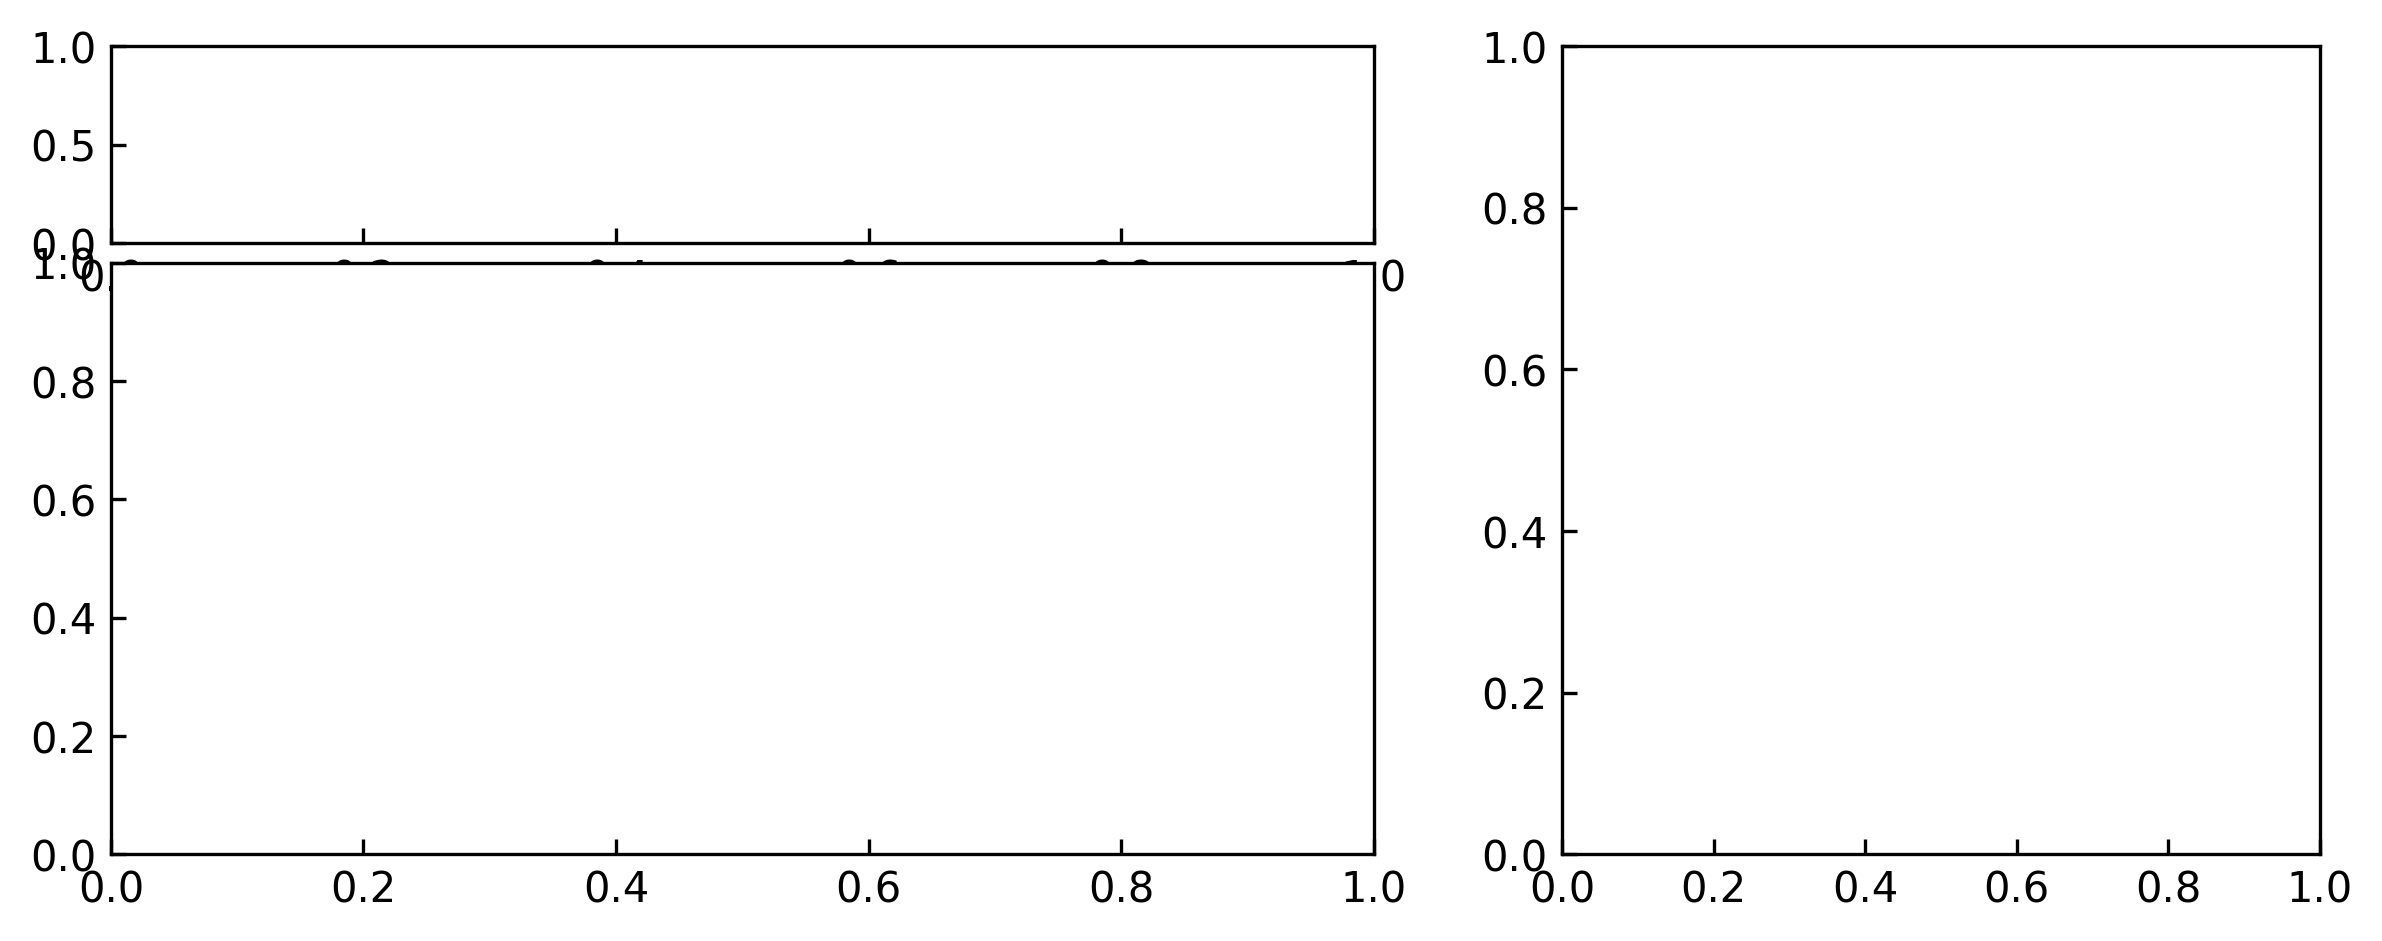

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Set consistent plot styling through rcParams
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.labelsize"] = 12

# Create the figure and mosaic axes
# Aim for left panel (data & residuals) to be wider than the right (correlation)
fig = plt.figure(figsize=(9.5, 3.5), dpi=300)

# Layout grid - 2 main panels (left with 2 rows, right spanning rows)
gs = fig.add_gridspec(
    2,  # Number of rows (for the left panel)
    3,  # Number of columns (Left Panel, Spacer, Right Panel)
    height_ratios=[1, 3],  # Relative heights of rows in the left panel
    width_ratios=[2.5, 0.1, 1.5],  # Relative widths: Left panel, spacer, Right panel
    hspace=0.05,  # Height space between rows in left panel
    wspace=0.1,  # Width space between main panels
)

# Axes for the left panel
ax_L_top = fig.add_subplot(gs[0, 0])  # Top-left for residuals
ax_L_bottom = fig.add_subplot(gs[1, 0], sharex=ax_L_top)  # Bottom-left for data

# Axe for the right panel
ax_R = fig.add_subplot(gs[:, 2])  # Spans both rows in the third column (index 2)

# --- Populate Top-Left Plot (ax_L_top, similar to ax1 in CELL 6) ---
# Using current (filtered) residuals_55deg and redisduals_clustered_si
ax_L_top.plot(
    redisduals_clustered_si["energy"],
    redisduals_clustered_si["55"],
    label="CuPc | Si (Clustered vs Exp)",
    color="darkorange",
    linewidth=2,
    alpha=0.8,
)

# Plot 2: "CuPc |CuI vs Si (Exp vs Exp)"
energy_for_filtered_residuals = df.loc[residuals_55deg.index, "energy"]
ax_L_top.plot(
    energy_for_filtered_residuals,
    residuals_55deg.values,
    label="CuPc |CuI vs Si (Exp vs Exp)",
    color="teal",
    linewidth=2,
    alpha=0.8,
)

# Styling for ax_L_top
ax_L_top.axhspan(-5, 5, color="green", alpha=0.1, zorder=0)
ax_L_top.set_ylabel("Residuals (%)")
ax_L_top.grid(True, alpha=0.3)
ax_L_top.axhline(y=0, color="black", linestyle="-", alpha=0.5)
ax_L_top.set_xlim(284, 305)
ax_L_top.set_ylim(-10, 10)

# Set integer yticks for residual plot
yticks = np.arange(-10, 11, 2)  # -10, -8, ..., 8, 10
ax_L_top.set_yticks(yticks)
ax_L_top.set_yticklabels([f"{int(y)}" for y in yticks])

# Hide x-axis label for the top plot
ax_L_top.tick_params(labelbottom=False)

# Add legend
ax_L_top.legend(
    loc="upper right",
    bbox_to_anchor=(1.0, 0.9),
    fontsize=9,
    ncol=1,
    handlelength=1.5,
    columnspacing=1.0,
    fancybox=False,
    framealpha=1,
)

# RMSE calculation and text
# Define energy range for RMSE
emin_rmse, emax_rmse = 284, 305

# Filter Cui data for the energy range
energy_mask_cui = (df["energy"] >= emin_rmse) & (df["energy"] <= emax_rmse)
cui_55_in_range = df.loc[energy_mask_cui, "55"]

# Filter Si data for the energy range
energy_mask_si = (df_si["energy"] >= emin_rmse) & (df_si["energy"] <= emax_rmse)
si_55_in_range = df_si.loc[energy_mask_si, "55"]

# Find common indices to ensure data points are comparable
common_indices = cui_55_in_range.index.intersection(si_55_in_range.index)

cui_55_common_idx = cui_55_in_range.loc[common_indices]
si_55_common_idx = si_55_in_range.loc[common_indices]

# Ensure no division by zero or NaN issues
valid_mask_for_common = (
    (si_55_common_idx != 0) & ~np.isnan(si_55_common_idx) & ~np.isnan(cui_55_common_idx)
)

cui_55_for_rmse = cui_55_common_idx[valid_mask_for_common]
si_55_for_rmse = si_55_common_idx[valid_mask_for_common]

rmse_percent_val = np.nan  # Default to NaN
if len(si_55_for_rmse) > 0 and len(cui_55_for_rmse) > 0:
    rmse_percent_val = np.sqrt(
        np.mean(((cui_55_for_rmse - si_55_for_rmse) / si_55_for_rmse * 100) ** 2)
    )

# Add RMSE text to plot if calculated
if not np.isnan(rmse_percent_val):
    ax_L_top.text(
        294.5,
        8.0,
        f"CuI - Si RMSE: {rmse_percent_val:.1f}%",
        ha="center",
        va="center",
        bbox=dict(
            facecolor="white", alpha=1.0, boxstyle="square,pad=0.2", edgecolor="gray"
        ),
    )

# --- Populate Bottom-Left Plot (ax_L_bottom) ---
ax_L_bottom.plot(
    df["energy"],
    df["55"] * 1e-4,
    label="CuI: 55°",
    color="crimson",
    linewidth=2,
    alpha=0.8,
)
ax_L_bottom.plot(
    df_si["energy"],
    df_si["55"] * 1e-4,
    label="Si: 55°",
    color="mediumblue",
    linewidth=2,
)

# Styling for data plot
ax_L_bottom.grid(True, alpha=0.3)
ax_L_bottom.set_xlabel("Energy (eV)")
ax_L_bottom.set_ylabel("Intensity (arb.)")

# Add legend for bottom plot
ax_L_bottom.legend(
    loc="best",
    fontsize=9,
    ncol=1,
    handlelength=1.5,
    fancybox=False,
    framealpha=1,
)

# Determine y-axis limits for consistent data display
# Get the maximum intensity across both datasets to set consistent y-limits
max_intensity = max(
    df["55"].max() * 1e-4,
    df_si["55"].max() * 1e-4,
)
# Round up to nearest integer for cleaner limits
y_max = np.ceil(max_intensity)
ax_L_bottom.set_ylim(0, y_max)

# Set integer yticks for the intensity plot
intensity_ticks = np.linspace(0, y_max, 6)  # 6 ticks including 0 and y_max
ax_L_bottom.set_yticks(intensity_ticks)
ax_L_bottom.set_yticklabels([f"{tick:.1f}" for tick in intensity_ticks])

# Set x-axis ticks
energy_ticks = np.arange(285, 306, 5)  # 285, 290, 295, 300, 305
ax_L_bottom.set_xticks(energy_ticks)
ax_L_bottom.set_xticklabels([f"{int(e)}" for e in energy_ticks])

# --- Populate Right Plot (ax_R, residual correlation) ---
x_data_raw = redisduals_clustered_si["55"]  # Filtered Pandas Series
y_data_raw = residuals_55deg.values  # Filtered Numpy array

correlation = np.nan  # Default to NaN

# Ensure consistent lengths for initial processing
if len(x_data_raw) != len(y_data_raw):
    x_plot_fit_data = np.array([])
    y_plot_fit_data = np.array([])
else:
    # Clean NaNs for all subsequent operations (correlation, plot, fit)
    valid_indices = ~np.isnan(x_data_raw.values) & ~np.isnan(y_data_raw)
    x_plot_fit_data = x_data_raw.values[valid_indices]  # Numpy array
    y_plot_fit_data = y_data_raw[valid_indices]  # Numpy array

# Calculate correlation coefficient using cleaned data
if len(x_plot_fit_data) > 1:
    correlation_matrix = np.corrcoef(x_plot_fit_data, y_plot_fit_data)
    correlation = correlation_matrix[0, 1]

# Plot scatter using cleaned data
ax_R.scatter(
    x_plot_fit_data,
    y_plot_fit_data,
    marker="o",
    color="darkorange",
    alpha=0.8,
    s=30,  # Control point size
    edgecolors="none",  # No edge color for cleaner appearance
)

# Calculate and plot line of best fit using cleaned data
if len(x_plot_fit_data) > 1:
    m, b = np.polyfit(x_plot_fit_data, y_plot_fit_data, 1)

    # Create x_line based on the range of data actually used for fitting
    x_line_min = np.min(x_plot_fit_data)
    x_line_max = np.max(x_plot_fit_data)

    if x_line_min != x_line_max:
        # Extend line slightly beyond data range for visual clarity
        x_range = x_line_max - x_line_min
        x_line = np.array([x_line_min - 0.1 * x_range, x_line_max + 0.1 * x_range])
        ax_R.plot(
            x_line,
            m * x_line + b,
            color="red",
            linestyle="--",
            label=f"y = {m:.2f}x + {b:.2f}",
            linewidth=1.5,
        )
        ax_R.legend(fontsize=8, loc="best", framealpha=1)

# Styling for correlation plot
ax_R.yaxis.set_label_position("right")
ax_R.tick_params(
    axis="y", which="both", left=False, right=True, labelleft=False, labelright=True
)

# Set x and y limits to be symmetric around zero and equal
max_abs_val = max(np.abs(np.concatenate([x_plot_fit_data, y_plot_fit_data])).max(), 10)
# Round to nearest integer for cleaner limits and ensure minimum range of ±10
max_abs_val = max(10, np.ceil(max_abs_val))

# Set integer ticks for both axes
residual_ticks = np.arange(-max_abs_val, max_abs_val + 1, 5)  # steps of 5
ax_R.set_xticks(residual_ticks)
ax_R.set_yticks(residual_ticks)
ax_R.set_xticklabels([f"{int(x)}" for x in residual_ticks])
ax_R.set_yticklabels([f"{int(y)}" for y in residual_ticks])

ax_R.set_xlim(-max_abs_val, max_abs_val)
ax_R.set_ylim(-max_abs_val, max_abs_val)

ax_R.set_xlabel("Residuals (Si 55°)")
ax_R.set_ylabel("Residuals (CuI 55°)")
ax_R.set_title(f"Residuals Correlation\n(Corr: {correlation:.2f})")
ax_R.grid(True, alpha=0.3)
ax_R.axhline(0, color="k", linestyle=":", alpha=0.5)
ax_R.axvline(0, color="k", linestyle=":", alpha=0.5)

# --- Final Figure Adjustments ---
fig.align_ylabels([ax_L_top, ax_L_bottom])  # Align y-labels of left panels
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Fine-tune the vertical spacing between subplots
plt.show()

# Save the figure
fig.savefig(
    "nexafs_comparison_with_si.svg",
    bbox_inches="tight",
    format="svg",
    dpi=300,
    transparent=True,
)